# Tasca mètodes de mostreig
Aprèn a realitzar mostreig de les dades amb Python.

Nivell 1
- Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.



Nivell 2
- Exercici 2
Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).



Nivell 3
- Exercici 3
Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

# Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt
import random
from IPython.display import display_html 
from imblearn.under_sampling import RandomUnderSampler

# Read the Data

For this Sprint i chose to work with the following datasets from the Olympic games .

Here is the link for the datasets : https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

In [2]:
df = pd.read_csv('athlete_events.csv')

In [3]:
df.shape

(271116, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
114829,58157,Yoshikatsu Kawaguchi,M,20.0,179.0,78.0,Japan,JPN,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,NaN
9714,5325,Francisco Esteban Arru Pardo,M,23.0,169.0,64.0,Chile,CHI,2000 Summer,2000,Summer,Sydney,Football,Football Men's Football,Bronze
211622,106272,Mariya Sergeyevna Savinova (-Farnosova),F,26.0,172.0,60.0,Russia,RUS,2012 Summer,2012,Summer,London,Athletics,Athletics Women's 800 metres,Gold
203089,101990,Henry Semiti Rogo,M,27.0,182.0,83.0,Fiji,FIJ,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 4 x 400 metres Relay,NaN
217662,109333,Roger Fielding Anthony Sharpley,M,23.0,NaN,NaN,Great Britain,GBR,1952 Summer,1952,Summer,Helsinki,Rowing,Rowing Men's Coxed Eights,NaN


In [6]:
# check for the nulls in the data frame 

df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
#drop the NA values in the my numeric columns 

df = df.dropna(subset =['Age','Height','Weight'])
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     175984
dtype: int64

**Content**

The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete\
competing in an individual Olympic event (athlete-events). The columns are:

ID - Unique number for each athlete\
Name - Athlete's name\
Sex - M or F\
Age - Integer\
Height - In centimeters\
Weight - In kilograms\
Team - Team name\
NOC - National Olympic Committee 3-letter code\
Games - Year and season\
Year - Integer\
Season - Summer or Winter\
City - Host city\
Sport - Sport\
Event - Event\
Medal - Gold, Silver, Bronze, or NA

In [8]:
# change categorical columns Sex, Season and Medal to integer: 
df_mapped = df.copy()
# mapping sex
df_mapped['Sex'] = df_mapped['Sex'].map({'M': 0, 'F': 1}).astype(int)
    
# mapping Season
df_mapped['Season'] = df_mapped['Season'].map({'Winter' : 0, 'Summer': 1}).astype(int)
    
# mapping Medal
medal_map = {np.nan: 0, 'Bronze': 3, 'Silver': 2, 'Gold': 1}
df_mapped['Medal'] = df_mapped['Medal'].map(medal_map).astype(int)

In [9]:
df_mapped.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,0,24.0,180.0,80.0,China,CHN,1992 Summer,1992,1,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,0,23.0,170.0,60.0,China,CHN,2012 Summer,2012,1,London,Judo,Judo Men's Extra-Lightweight,0
4,5,Christine Jacoba Aaftink,1,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,0,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,1,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,0,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,1,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,0,Albertville,Speed Skating,Speed Skating Women's 500 metres,0


In [10]:
X_sex = df.drop(['Sex'], axis = 1)
y_sex = df['Sex']


X_season = df.drop(['Season'], axis = 1)
y_season = df['Season']


X_medal = df.drop(['Medal'],axis = 1)
y_medal = df['Medal']

# Class distribution

In [11]:
sex_count = y_sex.value_counts()
sex_count


M    139454
F     66711
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

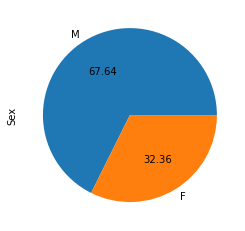

In [12]:
sex_count.plot.pie(autopct='%.2f')

In [13]:
season_count = y_season.value_counts()
season_count

Summer    166706
Winter     39459
Name: Season, dtype: int64

<AxesSubplot:ylabel='Season'>

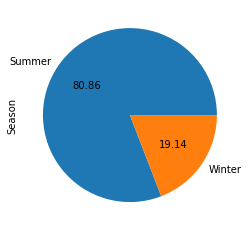

In [14]:
season_count.plot.pie(autopct='%.2f')

In [15]:
medal_count = y_medal.value_counts()
medal_count

Gold      10167
Bronze    10148
Silver     9866
Name: Medal, dtype: int64

([<matplotlib.patches.Wedge at 0x7f99cbe7a5e0>,
 [Text(0.5393891593951571, 0.9586758235853171, 'Gold'),
  Text(-1.0994601250100398, -0.03445915717059942, 'Bronze'),
  Text(0.5691563940893086, -0.9413081318395458, 'Silver')],
 [Text(0.29421226876099477, 0.522914085591991, '33.69'),
  Text(-0.5997055227327489, -0.018795903911236048, '33.62'),
  Text(0.31044894223053193, -0.5134407991852067, '32.69')])

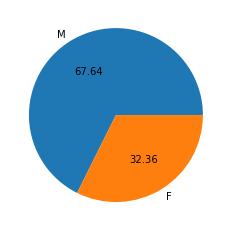

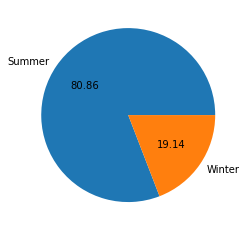

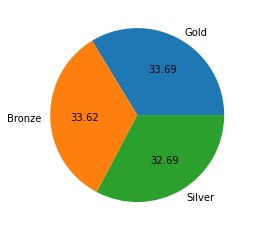

In [18]:
%matplotlib inline
fig1, ax1 = plt.subplots()
ax1.pie(y_sex.value_counts(), autopct='%.2f',labels=sex_count.index)

fig1, ax2 = plt.subplots()
ax2.pie(y_season.value_counts(), autopct='%.2f',labels=season_count.index)

fig1, ax3 = plt.subplots()
ax3.pie(y_medal.value_counts(), autopct='%.2f',labels=medal_count.index)

# Sampling Methods

## Simple random Sampling

The simple random sampling method selects random samples from a process or population where every unit hast the same probability of getting selected.

In [19]:

# Obtain simple random sample
simple_random_sample = df.sample(n=4).sort_values(by='Height')

# Save the sample mean in a separate variable
simple_random_mean = round(simple_random_sample['Height'].mean(),3)

# View sampled data frame
simple_random_sample

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142662,71584,Ketevan Losaberidze,F,23.0,162.0,75.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Archery,Archery Women's Individual,NaN
230651,115768,Shirley Barbara Strickland de la Hunty,F,26.0,172.0,57.0,Australia,AUS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's 100 metres,Bronze
5333,3022,Pentti Johannes Alonen,M,22.0,172.0,65.0,Finland,FIN,1948 Winter,1948,Winter,Sankt Moritz,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
59982,30720,Alvydas Duonla,M,24.0,190.0,90.0,Lithuania,LTU,2000 Summer,2000,Summer,Sydney,Canoeing,"Canoeing Men's Kayak Singles, 500 metres",NaN


## Random   Undersampling with imblearn

'not minority' = reasample all classes but the minority class

AttributeError: 'AxesSubplot' object has no attribute 'ser_title'

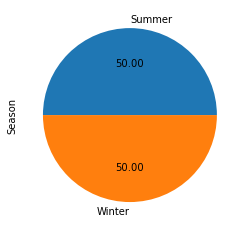

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rus_season = RandomUnderSampler(sampling_strategy=1) #

X_season_rus , y_season_rus = rus_season.fit_resample(X_season, y_season)

ax = y_season_rus.value_counts().plot.pie(autopct ='%.2f')
_ = ax.ser_title('Under-samlpling')



**We can see that after performing a Random under sampling we get the same number of observations for each class**

In [21]:
from collections import Counter
print(sorted(Counter(y_season_rus).items()))
print(sorted(Counter(y_season).items()))


[('Summer', 39459), ('Winter', 39459)]
[('Summer', 166706), ('Winter', 39459)]


**We can see that performing a under sampling make that he keep the number of the minority class observations**

## Random Oversampling

'Not majority" = resample all classes but the majority class

AttributeError: 'AxesSubplot' object has no attribute 'ser_title'

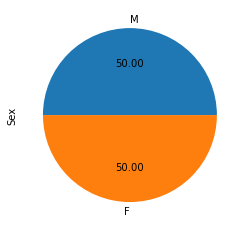

In [22]:
from imblearn.over_sampling import RandomOverSampler

ros_sex = RandomOverSampler(random_state=42)
X_sex_ros, y_sex_ros = ros_sex.fit_resample(X_sex, y_sex)

ax = y_sex_ros.value_counts().plot.pie(autopct ='%.2f')
_ = ax.ser_title('Over-samlpling')


We can see that after performing a Random oversampling we get the same number of observations for each class.

In [23]:
y_sex_ros.value_counts()

M    139454
F    139454
Name: Sex, dtype: int64

In [24]:
y_sex.value_counts()


M    139454
F     66711
Name: Sex, dtype: int64

In [25]:
from collections import Counter
print(sorted(Counter(y_sex_ros).items()))
print(sorted(Counter(y_sex).items()))


[('F', 139454), ('M', 139454)]
[('F', 66711), ('M', 139454)]


 **We can see that with this method we add more data in the minority class to balance the majority class**

## Systematic Sampling

In [26]:
def systematic_sampling(df, step):
    
    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

# Obtain a systematic sample and save it in a new variable
systematic_sample = systematic_sampling(df, 3)

# Save the sample mean in a separate variable
systematic_mean = round(systematic_sample['Height'].mean(),3)

# Store the real mean in a separate variable
real_mean = round(df['Height'].mean(),3)

# View sampled data frame
systematic_sample



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
271105,135565,Fernando scar Zylberberg,M,23.0,168.0,76.0,Argentina,ARG,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN


## Stratifeid Sampling

In [27]:
# Import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

# Set the split criteria
split = StratifiedShuffleSplit(n_splits=6, test_size=8)

for x, y in split.split(df_mapped, df_mapped['Medal']):
    stratified_random_sample = df.iloc[y].sort_values(by='Team')
    
# View sampled data frame
stratified_random_sample

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
246532,123443,Sndor Urbanik,M,23.0,172.0,60.0,Hungary,HUN,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's 20 kilometres Walk,NaN
24101,12640,Richrd Bodor,M,29.0,182.0,73.0,Hungary,HUN,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 100 metres Breaststroke,NaN
235936,118304,Wenling Tan Monfardini,F,31.0,152.0,45.0,Italy,ITA,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Singles,NaN
8730,4799,Shizuka Arakawa,F,24.0,164.0,50.0,Japan,JPN,2006 Winter,2006,Winter,Torino,Figure Skating,Figure Skating Women's Singles,Gold
241899,121162,Segun Moses Toriola,M,29.0,182.0,70.0,Nigeria,NGR,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Men's Singles,NaN
7926,4389,Nina Valentinovna Anisimova,F,31.0,180.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Triathlon,Triathlon Women's Olympic Distance,NaN
250175,125308,Rostislav Yevgenyevich Vargashkin,M,23.0,173.0,69.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Cycling,"Cycling Men's Tandem Sprint, 2,000 metres",NaN
159691,80146,"Margaret ""Meg"" Miners",F,16.0,156.0,51.0,Zimbabwe,ZIM,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 4 x 100 metres Medley Relay,NaN


In [28]:
# Op
stratified_random_sample.groupby('Team').mean()

,ID,Age,Height,Weight,Year
Team,,,,,
Hungary,68041.5,26.0,177.0,66.5,1998.0
Italy,118304.0,31.0,152.0,45.0,2004.0
Japan,4799.0,24.0,164.0,50.0,2006.0
Nigeria,121162.0,29.0,182.0,70.0,2004.0
Russia,4389.0,31.0,180.0,72.0,2004.0
Soviet Union,125308.0,23.0,173.0,69.0,1956.0
Zimbabwe,80146.0,16.0,156.0,51.0,1960.0


## SMOTE Sampling

In [29]:
df_smote = df_mapped[['Sex','Age', 'Height', 'Weight','Year', 'Season', 'Medal']]
df_smote.sample(5)

,Sex,Age,Height,Weight,Year,Season,Medal
106312,0,31.0,176.0,66.0,1972,1,0
123256,0,29.0,192.0,93.0,1998,0,0
196972,0,25.0,173.0,68.0,1996,1,0
150082,0,24.0,180.0,72.0,1920,1,0
251494,0,25.0,173.0,70.0,2016,1,1


In [30]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_season_sm, y_season_sm = sm.fit_resample(df_smote,df_smote['Season'])


In [31]:
from collections import Counter
print(sorted(Counter(y_season_sm).items()))

print(sorted(Counter(y_season).items()))


[(0, 166706), (1, 166706)]
[('Summer', 166706), ('Winter', 39459)]


**We can see that we get a sample with the same observation for each class by oversampling**

### BorderlineSmote Sampling

In [32]:
from imblearn.over_sampling import BorderlineSMOTE

sm_bl = BorderlineSMOTE()
X_medal_sm_bl , y_medal_sm_bl = sm_bl.fit_resample(df_smote,df_smote['Medal'])

In [33]:
from collections import Counter
print(sorted(Counter(y_medal_sm_bl).items()))

print(sorted(Counter(y_medal).items()))

[(0, 175984), (1, 175984), (2, 175984), (3, 175984)]


TypeError: '<' not supported between instances of 'str' and 'float'

### SVMSMOTE Sampling

In [ ]:
from imblearn.over_sampling import SVMSMOTE

sm_svm = SVMSMOTE()

X_medal_sm_svm , y_medal_sm_svm = sm_svm.fit_resample(df_smote,df_smote['Medal'])


In [ ]:
from collections import Counter
print(sorted(Counter(y_medal_sm_svm).items()))

print(sorted(Counter(y_medal).items()))

### Adaptive Synthetic Sampling (ADASYN)
Another approach involves generating synthetic samples inversely proportional to the density of the examples in the minority class.

In [34]:
from imblearn.over_sampling import ADASYN
sm_adasyn = ADASYN()
X_Medal_sm_adasyn , y_medal_sm_adasyn = sm_adasyn.fit_resample(df_smote,df_smote['Sex'])

In [35]:
from collections import Counter
print(sorted(Counter(y_medal_sm_adasyn).items()))

print(sorted(Counter(y_sex).items()))

[(0, 139454), (1, 133659)]
[('F', 66711), ('M', 139454)]


### Combination of over- and under-sampling

In [36]:
from imblearn.combine import SMOTEENN
sm_enn = SMOTEENN(random_state=42)
X_medal_sm_enn , y_medal_sm_enn = sm_enn.fit_resample(df_smote,df_smote['Medal'])

from imblearn.combine import SMOTETomek
sm_tomek = SMOTETomek(random_state=0)
X_medal_sm_tomek , y_medal_sm_tomek = sm_tomek.fit_resample(df_smote,df_smote['Medal'])

In [37]:
from collections import Counter
print(sorted(Counter(y_medal_sm_enn).items()))
print(sorted(Counter(y_medal_sm_tomek).items()))
print(sorted(Counter(y_medal).items()))

[(0, 154570), (1, 172312), (2, 173072), (3, 174208)]
[(0, 175843), (1, 175843), (2, 175941), (3, 175959)]


TypeError: '<' not supported between instances of 'str' and 'float'

## ALLKNN sampling

In [38]:
from imblearn.under_sampling import AllKNN
allknn = AllKNN()
X_allknn, y_allknn = allknn.fit_resample(df_smote,df_smote['Age'])

In [39]:
print(sorted(Counter(y_allknn).items()))

[(11.0, 4), (12.0, 17), (13.0, 123), (14.0, 626), (15.0, 1675), (16.0, 2748), (17.0, 3583), (18.0, 5411), (19.0, 7489), (20.0, 9939), (21.0, 12751), (22.0, 13818), (23.0, 14700), (24.0, 14369), (25.0, 13203), (26.0, 11507), (27.0, 10361), (28.0, 9100), (29.0, 6977), (30.0, 5532), (31.0, 4196), (32.0, 3522), (33.0, 2487), (34.0, 1896), (35.0, 1331), (36.0, 1091), (37.0, 772), (38.0, 577), (39.0, 487), (40.0, 429), (41.0, 336), (42.0, 271), (43.0, 233), (44.0, 207), (45.0, 159), (46.0, 116), (47.0, 119), (48.0, 92), (49.0, 80), (50.0, 77), (51.0, 42), (52.0, 58), (53.0, 37), (54.0, 33), (55.0, 8), (56.0, 21), (57.0, 9), (58.0, 10), (59.0, 1), (60.0, 13), (61.0, 9), (62.0, 2), (63.0, 4), (64.0, 2), (65.0, 2), (66.0, 4), (67.0, 2), (68.0, 1), (69.0, 2), (70.0, 1)]


## Reservoir sampling

In [41]:
# we use the reservoir algorithm: 
def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number
        
stream = generator(len(df))
reservoir = []
k= 250 # we want our sample to have a size of 250

for i, element in enumerate(stream):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
            # Select item in stream and remove one of the k items already selected
             reservoir[random.choice(range(0,k))] = element

df_reservoir = df.iloc[reservoir]

df_reservoir.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
226567,113862,Herbert Spindler,M,22.0,179.0,71.0,Austria,AUT,1976 Summer,1976,Summer,Montreal,Cycling,"Cycling Men's Road Race, Individual",NaN
67477,34494,Ji Fejtek,M,22.0,168.0,61.0,Czechoslovakia,TCH,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Men's Horse Vault,NaN
270189,135167,Wadysaw Antoni muda,M,22.0,187.0,84.0,Poland,POL,1976 Summer,1976,Summer,Montreal,Football,Football Men's Football,Silver
110930,56123,Junker Daniel Jrgensen,M,26.0,177.0,71.0,Denmark,DEN,1972 Summer,1972,Summer,Munich,Cycling,Cycling Men's 100 kilometres Team Time Trial,NaN
34308,17682,"Andrew ""Andy"" Campbell",M,28.0,218.0,93.0,Australia,AUS,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,NaN


## Summury Statistics comparaison 

In [42]:
def side_by_side_df(df1, df2, title1, title2):

    df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption(title1)
    df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption(title2)
    space = "\xa0" * 10
    display_html(df1_styler._repr_html_()+ space  + df2_styler._repr_html_(), raw=True)

In [43]:
df_describe = df[['Age', 'Height', 'Weight']].describe().round(2)
df_describe

,Age,Height,Weight
count,206165.00,206165.00,206165.00
mean,25.06,175.37,70.69
std,5.48,10.55,14.34
min,11.00,127.00,25.00
25%,21.00,168.00,60.00
50%,24.00,175.00,70.00
75%,28.00,183.00,79.00
max,71.00,226.00,214.00


### Simple Random Sampling

In [44]:
simple_random_sample_describe = simple_random_sample[['Age', 'Height', 'Weight']].describe().round(2)

title1 = 'df_describe'
title2 = 'simple_random_sample_describe'
side_by_side_df(df_describe, simple_random_sample_describe,title1, title2)

,Age,Height,Weight
count,206165.000000,206165.000000,206165.000000
mean,25.060000,175.370000,70.690000
std,5.480000,10.550000,14.340000
min,11.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,71.000000,226.000000,214.000000
,Age,Height,Weight
count,4.000000,4.000000,4.000000


### Random under sampling

In [45]:

X_season_rus_describe = X_season_rus[['Age', 'Height', 'Weight']].describe().round(2)

title1 = 'df_describe'
title2 = 'simple_random_sample_describe'
side_by_side_df(df_describe, simple_random_sample_describe,title1, title2)

,Age,Height,Weight
count,206165.000000,206165.000000,206165.000000
mean,25.060000,175.370000,70.690000
std,5.480000,10.550000,14.340000
min,11.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,71.000000,226.000000,214.000000
,Age,Height,Weight
count,4.000000,4.000000,4.000000


### Random over Sampling

In [46]:
X_sex_ros_describe = X_sex_ros[['Age', 'Height', 'Weight']].describe().round(2)

title1 = 'df_describe'
title2 = 'Random over sample describe'
side_by_side_df(df_describe, simple_random_sample_describe,title1, title2)

,Age,Height,Weight
count,206165.000000,206165.000000,206165.000000
mean,25.060000,175.370000,70.690000
std,5.480000,10.550000,14.340000
min,11.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,71.000000,226.000000,214.000000
,Age,Height,Weight
count,4.000000,4.000000,4.000000


### Systematic Sampling

In [47]:
systematic_sample_describe = systematic_sample[['Age', 'Height', 'Weight']].describe().round(2)

title1 = 'df_describe'
title2 = 'systematic_sample_describe'
side_by_side_df(df_describe, systematic_sample_describe,title1, title2)

,Age,Height,Weight
count,206165.000000,206165.000000,206165.000000
mean,25.060000,175.370000,70.690000
std,5.480000,10.550000,14.340000
min,11.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,71.000000,226.000000,214.000000
,Age,Height,Weight
count,68722.000000,68722.000000,68722.000000


### stratified_random_sample

In [48]:
stratified_random_sample_describe = stratified_random_sample[['Age', 'Height', 'Weight']].describe().round(2)

title1 = 'df_describe'
title2 = 'stratified_sample_describe'
side_by_side_df(df_describe, stratified_random_sample_describe,title1, title2)

,Age,Height,Weight
count,206165.000000,206165.000000,206165.000000
mean,25.060000,175.370000,70.690000
std,5.480000,10.550000,14.340000
min,11.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,71.000000,226.000000,214.000000
,Age,Height,Weight
count,8.000000,8.000000,8.000000


In [49]:
X_season_sm_describe =X_season_sm[['Age', 'Height', 'Weight']].describe().round(2)

title1 = 'df_describe'
title2 = 'Smote sample describe'
side_by_side_df(df_describe, simple_random_sample_describe,title1, title2)


,Age,Height,Weight
count,206165.000000,206165.000000,206165.000000
mean,25.060000,175.370000,70.690000
std,5.480000,10.550000,14.340000
min,11.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,71.000000,226.000000,214.000000
,Age,Height,Weight
count,4.000000,4.000000,4.000000



### Adasyn Sample

In [50]:
adasyn_sample_describe = X_Medal_sm_adasyn[['Age', 'Height', 'Weight']].describe().round()
title1 = 'df_describe'
title2 = 'Adasyn sample describe'
side_by_side_df(df_describe, adasyn_sample_describe,title1, title2)

,Age,Height,Weight
count,206165.000000,206165.000000,206165.000000
mean,25.060000,175.370000,70.690000
std,5.480000,10.550000,14.340000
min,11.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,71.000000,226.000000,214.000000
,Age,Height,Weight
count,273113.000000,273113.000000,273113.000000


### Reservoir Sampling

In [51]:
df_reservoir_describe = df_reservoir[['Age', 'Height', 'Weight']].describe().round(2)

title1 = 'df_describe'
title2 = 'df_reservoire_describe'
side_by_side_df(df_describe, df_reservoir_describe,title1, title2)

,Age,Height,Weight
count,206165.000000,206165.000000,206165.000000
mean,25.060000,175.370000,70.690000
std,5.480000,10.550000,14.340000
min,11.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,71.000000,226.000000,214.000000
,Age,Height,Weight
count,250.000000,250.000000,250.000000
